## Tony Zheng
## Final Project

In [2]:
%pwd

'C:\\Users\\tzhen\\Downloads'

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [11]:
df = pd.read_csv('Trading Analytics with Survey.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
df.head()

,ID.o,S Group,C Group,Price,Volume,TradeTime,EventTime,Offer,Bid,Buyer,...,Q23,Q24,Q26,Q27,Q45,Q28,Q47,Q29,Q30,SUM
0,S9C915T,S9,C915T,20.6,22,12:50:39,12041,20.6,20.300001,Server,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S9C815T,S9,C815T,20.5,19,12:57:32,12455,20.5,20.300001,Server,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S9C615T,S9,C615T,21.0,5,12:58:56,12539,20.9,20.600000,Server,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S9C315T,S9,C315T,20.0,23,12:59:21,12568,21.0,20.700000,Server,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S9C2315,S9,C2315,21.0,11,12:51:40,12102,20.9,20.400000,Server,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,Price,Volume,EventTime,Offer,Bid,buyerID,sellerID,Realized Tot,R per Tr,UnReal Q,...,Q23,Q24,Q26,Q27,Q45,Q28,Q47,Q29,Q30,SUM
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,20.808273,18.773723,12332.228710,20.803650,20.450609,1.459854,2.408759,3278.796627,43.184429,-164.790754,...,3.832418,3.821429,3.862637,3.826923,3.994505,3.736264,3.777473,3.554945,0.200549,106.016484
std,0.314029,13.470470,641.475586,0.265424,0.269360,3.535219,4.281363,6936.595084,306.923173,339.833403,...,0.942971,0.726122,0.952208,0.878416,0.742249,0.847426,0.811378,1.033730,0.400963,10.981063
min,19.500000,1.000000,4193.000000,19.500000,19.900000,0.000000,0.000000,-58791.400130,-1244.900000,-2349.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,55.000000
25%,20.600000,10.000000,12202.500000,20.600000,20.200000,0.000000,0.000000,32.550039,0.000000,-271.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,0.000000,99.000000
50%,20.900000,18.000000,12455.000000,20.900000,20.400000,0.000000,0.000000,1543.399964,0.000000,-76.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,107.000000
75%,21.000000,23.000000,12551.500000,21.000000,20.700000,0.000000,0.000000,5414.400053,0.000000,0.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,113.000000
max,22.000000,90.000000,12601.000000,21.900000,21.200000,10.000000,10.000000,46923.900000,1504.800000,2811.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,136.000000


In [13]:
df = df.drop(['q1','q2','q3','q5','q7','q8','q9','q10','q11','q12','q14','q15','q16','q17','q18','q19','q20','q21',
              'q22','q23','q24','q27','q45','q28','q47','volume','tradetime','eventtime','offer','bid','buyer',
              'seller','buyerid','sellerid','r_per_tr', 'u_per_tr_q','unreal_tot_$','1sthour?','lasthour?',
              '1sthr_usr/tot_vol','lasth-usr/tot_vol','(p2/p1)-1','ln(p2/p1)'],axis = 1)

# dropping columns
# I want to focus on the following questions:
#Q4 I traded based on price movements indicated on the TraderEx screen
#Q6 I did my best to win the maximum possible reward of $ 50.00
#Q13 Quantity of information would impact my trading decisions (More or less information would have made a difference).
#Q26 This experience has made me more interested in trading
#Q29 I could have earned more profits if I knew what the others were doing or planning on doing with their trades
#Q30 I have had prior experience in live trading stock /shares


In [14]:
df.head()

# I am noticing a lot of NA, will remove all rows with NA

,id.o,s_group,c_group,price,realized_tot,unreal_q,user_volu,user%oftotalvolu,total_volu,tradecount,...,qualify,gender,"based_on_the_information_provided,_the_best_strategy_is_to:",q4,q6,q13,q26,q29,q30,sum
0,S9C915T,S9,C915T,20.6,-9.500050,0,140,5.29%,2645,9,...,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S9C815T,S9,C815T,20.5,970.200000,-50,620,19.28%,3215,28,...,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S9C615T,S9,C615T,21.0,7924.000059,-381,421,14.63%,2878,16,...,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S9C315T,S9,C315T,20.0,3376.100000,-190,1620,42.60%,3803,105,...,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S9C2315,S9,C2315,21.0,-672.300048,33,797,26.88%,2965,57,...,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.shape
#this tells me there's 411 rows and 32 columns

(411, 32)

In [18]:
df.dropna()
#This should drop all rows with NA, originally there was 411 rows now there's 353 so we removed 58 rows.


,id.o,s_group,c_group,price,realized_tot,unreal_q,user_volu,user%oftotalvolu,total_volu,tradecount,...,qualify,gender,"based_on_the_information_provided,_the_best_strategy_is_to:",q4,q6,q13,q26,q29,q30,sum
7,S9C2015,S9,C2015,21.000000,-435.100000,20,310,9.28%,3340,21,...,T,M,SELL FIRST AND THEN BUY LATER to make profit (...,3.0,2.0,4.0,4.0,2.0,0.0,97.0
8,S9C1915,S9,C1915,21.000000,1109.200000,-53,165,6.04%,2732,18,...,T,M,BUY FIRST AND THEN SELL LATER to make profit (...,3.0,2.0,4.0,4.0,2.0,0.0,97.0
9,S9C1615,S9,C1615,21.000000,17.799998,0,164,5.94%,2761,12,...,T,M,BUY FIRST AND THEN SELL LATER to make profit (...,5.0,5.0,3.0,5.0,3.0,1.0,92.0
10,S9C15TS,S9,C15TS,21.000000,-1245.700090,58,882,25.11%,3512,58,...,T,F,BUY FIRST AND THEN SELL LATER to make profit (...,3.0,4.0,4.0,4.0,4.0,0.0,106.0
11,S9C1515,S9,C1515,21.000000,-20.000000,0,200,7.16%,2793,16,...,T,M,SELL FIRST AND THEN BUY LATER to make profit (...,4.0,3.0,4.0,4.0,3.0,0.0,104.0
12,S9C1415,S9,C1415,21.000000,1535.500000,-75,135,4.28%,3156,11,...,T,F,BUY FIRST AND THEN SELL LATER to make profit (...,2.0,4.0,2.0,4.0,4.0,0.0,114.0
13,S9C1215,S9,C1215,20.900000,3238.200094,-162,730,23.19%,3148,39,...,T,M,BUY FIRST AND THEN SELL LATER to make profit (...,4.0,4.0,3.0,4.0,4.0,0.0,109.0
14,S9C115T,S9,C115T,21.000000,1249.000050,-60,60,2.16%,2778,2,...,T,F,BUY FIRST AND THEN SELL LATER to make profit (...,4.0,5.0,4.0,5.0,3.0,0.0,116.0
15,S9C1115,S9,C1115,20.600000,102.200025,-7,333,11.64%,2861,21,...,T,M,BUY FIRST AND THEN SELL LATER to make profit (...,4.0,4.0,4.0,3.0,3.0,0.0,102.0
16,S9C1015,S9,C1015,20.700000,1121.000000,-55,115,4.02%,2864,7,...,T,M,SELL FIRST AND THEN BUY LATER to make profit (...,5.0,5.0,4.0,5.0,4.0,1.0,108.0


In [27]:
df_original = pd.read_csv('Trading Analytics with Survey.csv')
df_LikertQuestions = DataFrame(df_original,columns=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q26','Q27','Q45','Q28','Q47','Q29'])

#Making this dataframe that only focuses on the Likert Questions


In [28]:
df_LikertQuestions

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q21,Q22,Q23,Q24,Q26,Q27,Q45,Q28,Q47,Q29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,3.0,4.0,3.0,1.0,2.0,4.0,1.0,4.0,4.0,...,5.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0
8,1.0,3.0,4.0,3.0,1.0,2.0,4.0,1.0,4.0,4.0,...,5.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0
9,1.0,5.0,3.0,5.0,1.0,5.0,3.0,1.0,3.0,2.0,...,3.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,3.0,3.0


In [31]:
df_LikertQuestions["Q1"].value_counts()

#Testing to see if the NA would affect the count, which it does not.

2.0    156
4.0     70
3.0     61
1.0     53
5.0     24
Name: Q1, dtype: int64

In [33]:
piechart = df_LikertQuestions.apply(pd.value_counts)
sum_rowcount = (piechart.sum(axis=1))
sum_rowcount

#To get the sum of the row counts to make a pie chart

1.0     515.0
2.0    1492.0
3.0    2397.0
4.0    4753.0
5.0    1763.0
dtype: float64

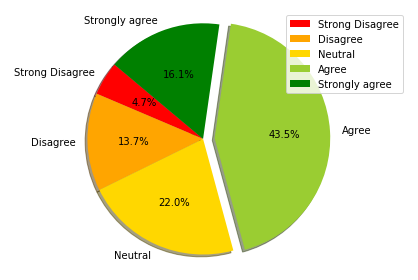

In [36]:
#define labels
labels = ['Strong Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']
sizes = [515,1492,2397,4753,1763]
colors = ['red', 'orange', 'gold', 'yellowgreen', 'green']
explode = (0, 0, 0, 0.1,0) 
# Pops out the 4th slice (Agree is biggest)

plt.pie(sizes, explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show();

#This pie chart shows a percentage breakdown of the responses for every question
#From looking at this pie chart, you can see that majority responses are agreeable or neutral.
# 43.5% (Agree) + 16.1% (Strongly Agree) = 59.6% + 22% (Neutral) = 81.6% Neutral or Positive Response to all Survey Questions
# Only 13.7% (Disagree) + 4.7% (Strongly Disagree) = 18.4%


In [39]:
# Now I want to do the samething, but only focus on Q4, Q6, Q13, Q26, and Q29

df_5Q = DataFrame(df_original,columns=['Q4','Q6','Q13','Q26','Q29'])
pie5 = df_5Q.apply(pd.value_counts)
sum_p5 = (pie5.sum(axis=1))
sum_p5


1.0     52
2.0    173
3.0    338
4.0    888
5.0    369
dtype: int64

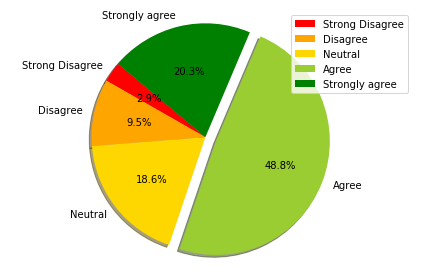

In [40]:
#define labels
labels1 = ['Strong Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']
sizes1 = [52,173,338,888,369]
colors1 = ['red', 'orange', 'gold', 'yellowgreen', 'green']
explode1 = (0, 0, 0, 0.1,0) 
# Pops out the 4th slice (Agree is biggest)

plt.pie(sizes1, explode=explode1,labels=labels1, colors=colors1,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show();

# When looking at subset (5 questions) rather than the full dataset, the percentages are pretty similar
# 48.8% (Agree) + 20.3% (Strongly Agree) = 69.1% comparing to 59.6% Previously
# 9.5% (Disagree) + 2.9% (Strongly Disagree) = 12.4% comparing to 18.4% Previously
# Neutral 18.6% compared to 22% Previously
# Overall this subset has acceptance deviation

In [79]:
df_G5 = DataFrame(df_original,columns=['Gender','Q4','Q6','Q13','Q26','Q29'])

df_G5.dropna()
df_G5.shape

,Gender,Q4,Q6,Q13,Q26,Q29
7,M,3.0,2.0,4.0,4.0,2.0
8,M,3.0,2.0,4.0,4.0,2.0
9,M,5.0,5.0,3.0,5.0,3.0
10,F,3.0,4.0,4.0,4.0,4.0
11,M,4.0,3.0,4.0,4.0,3.0
12,F,2.0,4.0,2.0,4.0,4.0
13,M,4.0,4.0,3.0,4.0,4.0
14,F,4.0,5.0,4.0,5.0,3.0
15,M,4.0,4.0,4.0,3.0,3.0
16,M,5.0,5.0,4.0,5.0,4.0


(411, 6)

In [80]:
df_G5.groupby(['Gender']).count()

# There are 166 Females and 198 Females that traded and answered surveys for our 5 questions of focus
# Next step is to identify if females answered signifantly differently than males

,Q4,Q6,Q13,Q26,Q29
Gender,,,,,
F,166,166,166,166,166
M,198,198,198,198,198


In [83]:
df_G5.groupby(['Gender', 'Q4']).count()

Q6  Q13  Q26  Q29
Gender Q4                     
F      1.0    8    8    8    8
       2.0   12   12   12   12
       3.0   27   27   27   27
       4.0   98   98   98   98
       5.0   21   21   21   21
M      1.0    6    6    6    6
       2.0   24   24   24   24
       3.0   22   22   22   22
       4.0  112  112  112  112
       5.0   34   34   34   34

In [81]:
df_G5.groupby(['Gender','Q4','Q6','Q13', 'Q26', 'Q29']).count()
# Not the right away to do this


Empty DataFrame
Columns: []
Index: [(F, 1.0, 1.0, 4.0, 5.0, 4.0), (F, 1.0, 2.0, 2.0, 2.0, 4.0), (F, 1.0, 3.0, 3.0, 4.0, 4.0), (F, 1.0, 3.0, 4.0, 3.0, 5.0), (F, 1.0, 4.0, 4.0, 4.0, 3.0), (F, 1.0, 5.0, 5.0, 5.0, 1.0), (F, 1.0, 5.0, 5.0, 5.0, 5.0), (F, 2.0, 1.0, 4.0, 1.0, 4.0), (F, 2.0, 3.0, 3.0, 3.0, 3.0), (F, 2.0, 3.0, 4.0, 2.0, 3.0), (F, 2.0, 3.0, 4.0, 3.0, 4.0), (F, 2.0, 4.0, 2.0, 4.0, 3.0), (F, 2.0, 4.0, 2.0, 4.0, 4.0), (F, 2.0, 4.0, 3.0, 3.0, 3.0), (F, 2.0, 4.0, 4.0, 4.0, 2.0), (F, 2.0, 4.0, 5.0, 3.0, 4.0), (F, 2.0, 4.0, 5.0, 5.0, 4.0), (F, 2.0, 5.0, 4.0, 5.0, 4.0), (F, 2.0, 5.0, 5.0, 4.0, 4.0), (F, 3.0, 2.0, 4.0, 3.0, 4.0), (F, 3.0, 2.0, 4.0, 4.0, 2.0), (F, 3.0, 2.0, 4.0, 4.0, 3.0), (F, 3.0, 2.0, 4.0, 5.0, 3.0), (F, 3.0, 3.0, 2.0, 4.0, 3.0), (F, 3.0, 3.0, 3.0, 4.0, 4.0), (F, 3.0, 3.0, 4.0, 3.0, 3.0), (F, 3.0, 3.0, 4.0, 3.0, 5.0), (F, 3.0, 3.0, 4.0, 4.0, 4.0), (F, 3.0, 4.0, 2.0, 4.0, 2.0), (F, 3.0, 4.0, 3.0, 4.0, 3.0), (F, 3.0, 4.0, 4.0, 2.0, 4.0), (F, 3.0, 4.0, 4.0, 3.0, 4.0), (F, 3.0, 4.0, 4.0, 4.0, 4.0), (F, 3.0, 5.0, 2.0, 5.0, 5.0), (F, 3.0, 5.0, 3.0, 4.0, 2.0), (F, 3.0, 5.0, 4.0, 2.0, 3.0), (F, 3.0, 5.0, 4.0, 4.0, 4.0), (F, 3.0, 5.0, 4.0, 5.0, 4.0), (F, 4.0, 1.0, 1.0, 2.0, 5.0), (F, 4.0, 1.0, 4.0, 3.0, 3.0), (F, 4.0, 1.0, 4.0, 4.0, 3.0), (F, 4.0, 2.0, 3.0, 2.0, 4.0), (F, 4.0, 2.0, 4.0, 2.0, 3.0), (F, 4.0, 2.0, 4.0, 2.0, 4.0), (F, 4.0, 2.0, 4.0, 4.0, 4.0), (F, 4.0, 2.0, 4.0, 5.0, 2.0), (F, 4.0, 2.0, 5.0, 3.0, 4.0), (F, 4.0, 2.0, 5.0, 4.0, 5.0), (F, 4.0, 2.0, 5.0, 5.0, 3.0), (F, 4.0, 2.0, 5.0, 5.0, 4.0), (F, 4.0, 3.0, 2.0, 2.0, 2.0), (F, 4.0, 3.0, 3.0, 4.0, 2.0), (F, 4.0, 3.0, 3.0, 5.0, 5.0), (F, 4.0, 3.0, 4.0, 2.0, 4.0), (F, 4.0, 3.0, 4.0, 3.0, 3.0), (F, 4.0, 3.0, 4.0, 3.0, 4.0), (F, 4.0, 3.0, 4.0, 4.0, 1.0), (F, 4.0, 3.0, 4.0, 4.0, 3.0), (F, 4.0, 3.0, 4.0, 4.0, 4.0), (F, 4.0, 3.0, 4.0, 4.0, 5.0), (F, 4.0, 3.0, 5.0, 4.0, 2.0), (F, 4.0, 3.0, 5.0, 4.0, 3.0), (F, 4.0, 3.0, 5.0, 5.0, 1.0), (F, 4.0, 3.0, 5.0, 5.0, 4.0), (F, 4.0, 4.0, 3.0, 2.0, 2.0), (F, 4.0, 4.0, 3.0, 2.0, 3.0), (F, 4.0, 4.0, 3.0, 3.0, 4.0), (F, 4.0, 4.0, 3.0, 4.0, 4.0), (F, 4.0, 4.0, 3.0, 4.0, 5.0), (F, 4.0, 4.0, 4.0, 1.0, 2.0), (F, 4.0, 4.0, 4.0, 2.0, 4.0), (F, 4.0, 4.0, 4.0, 3.0, 3.0), (F, 4.0, 4.0, 4.0, 4.0, 3.0), (F, 4.0, 4.0, 4.0, 4.0, 4.0), (F, 4.0, 4.0, 4.0, 4.0, 5.0), (F, 4.0, 4.0, 4.0, 5.0, 3.0), (F, 4.0, 4.0, 4.0, 5.0, 4.0), (F, 4.0, 4.0, 4.0, 5.0, 5.0), (F, 4.0, 4.0, 5.0, 4.0, 3.0), (F, 4.0, 4.0, 5.0, 4.0, 4.0), (F, 4.0, 5.0, 3.0, 4.0, 2.0), (F, 4.0, 5.0, 3.0, 5.0, 3.0), (F, 4.0, 5.0, 3.0, 5.0, 4.0), (F, 4.0, 5.0, 3.0, 5.0, 5.0), (F, 4.0, 5.0, 4.0, 2.0, 3.0), (F, 4.0, 5.0, 4.0, 3.0, 3.0), (F, 4.0, 5.0, 4.0, 3.0, 5.0), (F, 4.0, 5.0, 4.0, 4.0, 2.0), (F, 4.0, 5.0, 4.0, 4.0, 4.0), (F, 4.0, 5.0, 4.0, 4.0, 5.0), (F, 4.0, 5.0, 4.0, 5.0, 1.0), (F, 4.0, 5.0, 4.0, 5.0, 2.0), (F, 4.0, 5.0, 4.0, 5.0, 3.0), (F, 4.0, 5.0, 4.0, 5.0, 4.0), (F, 4.0, 5.0, 4.0, 5.0, 5.0), (F, 4.0, 5.0, 5.0, 4.0, 4.0), (F, 4.0, 5.0, 5.0, 5.0, 3.0), (F, 4.0, 5.0, 5.0, 5.0, 4.0), (F, 4.0, 5.0, 5.0, 5.0, 5.0), (F, 5.0, 3.0, 3.0, 4.0, 2.0), ...]

[251 rows x 0 columns]

In [87]:
df_G5.apply(pd.value_counts).T
#Gets the total counts, but it is not split by gender.
df_G5.dtypes

#Maybe converting to categorical will let groupby work.


,1.0,2.0,3.0,4.0,5.0,F,M
Gender,NaN,NaN,NaN,NaN,NaN,166.0,198.0
Q4,14.0,36.0,49.0,210.0,55.0,NaN,NaN
Q6,15.0,31.0,90.0,126.0,102.0,NaN,NaN
Q13,5.0,20.0,61.0,218.0,60.0,NaN,NaN
Q26,8.0,30.0,55.0,182.0,89.0,NaN,NaN
Q29,10.0,56.0,83.0,152.0,63.0,NaN,NaN


Gender     object
Q4        float64
Q6        float64
Q13       float64
Q26       float64
Q29       float64
dtype: object

In [97]:
df_G  = df_G5
df_G.dropna()


,Gender,Q4,Q6,Q13,Q26,Q29
7,M,3.0,2.0,4.0,4.0,2.0
8,M,3.0,2.0,4.0,4.0,2.0
9,M,5.0,5.0,3.0,5.0,3.0
10,F,3.0,4.0,4.0,4.0,4.0
11,M,4.0,3.0,4.0,4.0,3.0
12,F,2.0,4.0,2.0,4.0,4.0
13,M,4.0,4.0,3.0,4.0,4.0
14,F,4.0,5.0,4.0,5.0,3.0
15,M,4.0,4.0,4.0,3.0,3.0
16,M,5.0,5.0,4.0,5.0,4.0


In [100]:
df_G['Q4'] = df_G['Q4'].astype('category',copy=False)
df_G['Q6'] = df_G['Q6'].astype('category',copy=False)
df_G['Q13'] = df_G['Q13'].astype('category',copy=False)
df_G['Q26'] = df_G['Q26'].astype('category',copy=False)
df_G['Q29'] = df_G['Q29'].astype('category',copy=False)



In [106]:
df_G.dtypes
#sucessfully able to convert the questions into categorical
df_G.groupby(['Gender', 'Q4']).count()

#It seems I cannot figure out an easier way to split the question responses by gender, so I have to do it by hand one question at a time.

# Q4 Female = 8,12,27,98,21
# Q4 Male = 6, 24, 22, 112, 34

df_G.groupby(['Gender', 'Q6']).count()

# Q6 Female = 5,14,38,57,52
# Q6 Male =10,17,52,69,50

Gender      object
Q4        category
Q6        category
Q13       category
Q26       category
Q29       category
dtype: object

Q6  Q13  Q26  Q29
Gender Q4                     
F      1.0    8    8    8    8
       2.0   12   12   12   12
       3.0   27   27   27   27
       4.0   98   98   98   98
       5.0   21   21   21   21
M      1.0    6    6    6    6
       2.0   24   24   24   24
       3.0   22   22   22   22
       4.0  112  112  112  112
       5.0   34   34   34   34

Q4  Q13  Q26  Q29
Gender Q6                    
F      1.0   5    5    5    5
       2.0  14   14   14   14
       3.0  38   38   38   38
       4.0  57   57   57   57
       5.0  52   52   52   52
M      1.0  10   10   10   10
       2.0  17   17   17   17
       3.0  52   52   52   52
       4.0  69   69   69   69
       5.0  50   50   50   50

In [109]:
df_G.groupby(['Gender', 'Q13']).count()

# Q13 Female = 3,9,22,105,27
# Q13 Male = 2,11,39,113,33

df_G.groupby(['Gender', 'Q26']).count()

# Q26 Female = 2,15,24,81,44
# Q26 Male = 6,15,31,101,45

df_G.groupby(['Gender', 'Q29']).count()

#Q29 Female = 6,22,40,74,24
#Q29 Male = 4,34,43,78,39 

Q4   Q6  Q26  Q29
Gender Q13                    
F      1.0    3    3    3    3
       2.0    9    9    9    9
       3.0   22   22   22   22
       4.0  105  105  105  105
       5.0   27   27   27   27
M      1.0    2    2    2    2
       2.0   11   11   11   11
       3.0   39   39   39   39
       4.0  113  113  113  113
       5.0   33   33   33   33

Q4   Q6  Q13  Q29
Gender Q26                    
F      1.0    2    2    2    2
       2.0   15   15   15   15
       3.0   24   24   24   24
       4.0   81   81   81   81
       5.0   44   44   44   44
M      1.0    6    6    6    6
       2.0   15   15   15   15
       3.0   31   31   31   31
       4.0  101  101  101  101
       5.0   45   45   45   45

Q4  Q6  Q13  Q26
Gender Q29                  
F      1.0   6   6    6    6
       2.0  22  22   22   22
       3.0  40  40   40   40
       4.0  74  74   74   74
       5.0  24  24   24   24
M      1.0   4   4    4    4
       2.0  34  34   34   34
       3.0  43  43   43   43
       4.0  78  78   78   78
       5.0  39  39   39   39

In [118]:
# Q4 Female = 8,12,27,98,21
# Q4 Male = 6, 24, 22, 112, 34
F4 = [8,12,27,98,21]
M4 = [6, 24, 22, 112, 34]

# Q6 Female = 5,14,38,57,52
# Q6 Male =10,17,52,69,50
F6 = [5,14,38,57,52]
M6 = [10,17,52,69,50]

# Q13 Female = 3,9,22,105,27
# Q13 Male = 2,11,39,113,33
F13 =[3,9,22,105,27]
M13 = [2,11,39,113,33]

# Q26 Female = 2,15,24,81,44
# Q26 Male = 6,15,31,101,45
F26=[2,15,24,81,44]
M26=[6,15,31,101,45]

#Q29 Female = 6,22,40,74,24
#Q29 Male = 4,34,43,78,39 
F29=[6,22,40,74,24]
M29=[4,34,43,78,39]

mylist = [F4, F6, F13, F26, F29]
mylist = sum(map(np.array, mylist))
print (mylist)


mylistM = [M4, M6, M13, M26, M29]
mylistM = sum(map(np.array, mylistM))
print (mylistM)

[ 24  72 151 415 168]
[ 28 101 187 473 201]


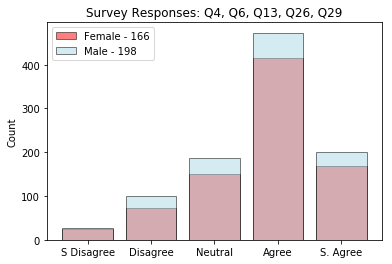

In [184]:
objects = ('S Disagree', 'Disagree', 'Neutral', 'Agree', 'S. Agree')
y_pos = np.arange(len(objects))
female = [24,72,151,415,168]
male = [28,101,187,473,201]


plt.bar(objects, female, align='center', color='red',edgecolor='black', alpha=0.5)
plt.bar(objects, male, align='center', color='lightblue',edgecolor='black', alpha=0.5)
plt.ylabel('Count')
plt.title('Survey Responses: Q4, Q6, Q13, Q26, Q29')
Gender = ['Female - 166', 'Male - 198']
plt.legend(Gender,loc=2)

# total 166 Females vs 198 Males surveyed, obviously males will have the higher numbers.
# Not many individuals strongly disagree with the survey questions, even with  32 more male responses the strongly disagree only has a difference of 4.
plt.show();

In [162]:

df.groupby('gender').mean()
results=df.groupby('gender').mean()
pd.set_option('display.expand_frame_repr', False)
#Allows you to display all columns

#It seems on average females made more trades than males (based on tradecount and user_volu)

,price,realized_tot,unreal_q,user_volu,total_volu,tradecount,1st_hourvolu,1sthouruservolu,last_hourvolu,lasthouruservolu,vwap,price*v,net,user_buy,user_sell,user_vol_traded_(buy+sell),q4,q6,q13,q26,q29,q30,sum
gender,,,,,,,,,,,,,,,,,,,,,,,
F,20.800602,2699.266906,-137.379518,1085.415663,3347.192771,54.734940,1265.036145,226.319277,2575.879518,419.373494,20.281287,410.553013,-122.596959,474.018072,611.397590,1085.415663,3.674699,3.825301,3.867470,3.903614,3.530120,0.240964,106.548193
M,20.814141,3882.617708,-193.772727,903.732323,3246.267677,47.277778,1209.373737,193.186869,2521.585859,359.262626,20.279178,374.714647,-114.148461,354.979798,548.752525,903.732323,3.727273,3.666667,3.828283,3.828283,3.575758,0.166667,105.570707


In [159]:
#df.groupby('gender').mode()
#df.groupby('gender').agg(pd.Series.mode)
#the above methods did not work for mode

df.groupby(['gender']).agg(lambda x: stats.mode(x)[0][0])
#This shows the mode for females is S6 and for males S3. The strategy most often given is to buy first and sell later to make profit. 
# The most common answer for survey responses is 4 which makes sense from the earlier pie charts.


C:\Users\tzhen\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,id.o,s_group,c_group,price,realized_tot,unreal_q,user_volu,user%oftotalvolu,total_volu,tradecount,1st_hourvolu,1sthouruservolu,last_hourvolu,lasthouruservolu,1sthr_usr/1sthr_tot,...,vwap,price*v,net,user_buy,user_sell,user_vol_traded_(buy+sell),qualify,"based_on_the_information_provided,_the_best_strategy_is_to:",q4,q6,q13,q26,q29,q30,sum
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,S10C17,S6,C10a1,21.0,3563.000092,0,585,28.45%,2825,35,788,0,2616,0,0.00%,...,20.317902,231.0,110.200092,50,120,585,B,BUY FIRST AND THEN SELL LATER to make profit (...,4.0,4.0,4.0,4.0,4.0,0.0,112.0
M,S10C715,S3,C1014,21.0,-683.600000,0,240,13.73%,2767,30,788,0,2616,0,0.00%,...,20.260667,231.0,-683.600000,199,120,240,T,BUY FIRST AND THEN SELL LATER to make profit (...,4.0,4.0,4.0,4.0,4.0,0.0,98.0


In [177]:
results
results.shape
results.dtypes

,price,realized_tot,unreal_q,user_volu,total_volu,tradecount,1st_hourvolu,1sthouruservolu,last_hourvolu,lasthouruservolu,vwap,price*v,net,user_buy,user_sell,user_vol_traded_(buy+sell),q4,q6,q13,q26,q29,q30,sum
gender,,,,,,,,,,,,,,,,,,,,,,,
F,20.800602,2699.266906,-137.379518,1085.415663,3347.192771,54.734940,1265.036145,226.319277,2575.879518,419.373494,20.281287,410.553013,-122.596959,474.018072,611.397590,1085.415663,3.674699,3.825301,3.867470,3.903614,3.530120,0.240964,106.548193
M,20.814141,3882.617708,-193.772727,903.732323,3246.267677,47.277778,1209.373737,193.186869,2521.585859,359.262626,20.279178,374.714647,-114.148461,354.979798,548.752525,903.732323,3.727273,3.666667,3.828283,3.828283,3.575758,0.166667,105.570707


(2, 23)

price                         float64
realized_tot                  float64
unreal_q                      float64
user_volu                     float64
total_volu                    float64
tradecount                    float64
1st_hourvolu                  float64
1sthouruservolu               float64
last_hourvolu                 float64
lasthouruservolu              float64
vwap                          float64
price*v                       float64
net                           float64
user_buy                      float64
user_sell                     float64
user_vol_traded_(buy+sell)    float64
q4                            float64
q6                            float64
q13                           float64
q26                           float64
q29                           float64
q30                           float64
sum                           float64
dtype: object

In [187]:
# Performing a t-test, trying to find H0: evidence of a significant difference between population means (2-sample t) 
female = results.iloc[0].values
male = results.iloc[1].values

female = female[:-7]
male = male[:-7]
#removing the means associated with the surveys

print("Male Mean Values")
male
print("Female Mean Values")
female

sp.stats.ttest_ind(female,male)

#The p-value is 0.97 which is greater than 0.05, this means weak evidence against the null hypothesis, so we fail to reject the null hypothesis
#We can conclude that there is not a significant difference between males and females. 


Male Mean Values


array([  20.81414143, 3882.61770755, -193.77272727,  903.73232323,
       3246.26767677,   47.27777778, 1209.37373737,  193.18686869,
       2521.58585859,  359.26262626,   20.27917789,  374.71464683,
       -114.14846098,  354.97979798,  548.75252525,  903.73232323])

Female Mean Values


array([  20.80060243, 2699.2669061 , -137.37951807, 1085.41566265,
       3347.19277108,   54.73493976, 1265.03614458,  226.31927711,
       2575.87951807,  419.37349398,   20.28128663,  410.55301279,
       -122.59695878,  474.01807229,  611.39759036, 1085.41566265])

Ttest_indResult(statistic=-0.036776115271629856, pvalue=0.9709071469199977)

In [82]:
# I tried to implement this function to make graphs comparing the gender breakdown
# of the survey questions, but I could not get it working. 

'''
order = ['Strongly Disagree', 'Disagree',
        'Neutral', 'Agree', 'Strongly Agree']

def plot_Response(df_G5, col_name, Gender, order=order, 
                          palette='Spectral', ax=None):
    
    reduced_df = df[[col_name, 'Gender']]

    # Gets the relative frequencies (percentages) for "this-age-group" only
    data_to_plot = reduced_df[reduced_df['Gender'] == Gender][col_name].value_counts(normalize=True)
    
    sns.barplot(y = data_to_plot.index, 
                x = data_to_plot.values, 
                order = order, 
                ax = ax,
                palette = palette, 
                edgecolor = 'black'
                ).set_title('Gender Breakdown'.format(Gender, col_name))
    
    allQ = ['Q4', 'Q6','Q13', 'Q26', 'Q29']


buckets = [group for group in df_G5[2].unique()]

for df_G5 in allQ:
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), 
                           sharey=True, sharex=True)

    for a, Gender in zip(ax.flatten(), buckets):
        plot(Genders, df_G5, Gender=Gender, ax=a)
        
        # Keeps x-axis tick labels for each group of plots
        a.xaxis.set_tick_params(which='both', labelbottom=True)
        
        # Suppresses displaying the question along the y-axis
        a.yaxis.label.set_visible(False)
    

    plt.tight_layout()
    
'''

'\norder = [\'Strongly Disagree\', \'Disagree\',\n        \'Neutral\', \'Agree\', \'Strongly Agree\']\n\ndef plot_Response(df_G5, col_name, Gender, order=order, \n                          palette=\'Spectral\', ax=None):\n    \n    reduced_df = df[[col_name, \'Gender\']]\n\n    # Gets the relative frequencies (percentages) for "this-age-group" only\n    data_to_plot = reduced_df[reduced_df[\'Gender\'] == Gender][col_name].value_counts(normalize=True)\n    \n    sns.barplot(y = data_to_plot.index, \n                x = data_to_plot.values, \n                order = order, \n                ax = ax,\n                palette = palette, \n                edgecolor = \'black\'\n                ).set_title(\'Gender Breakdown\'.format(Gender, col_name))\n    \n    allQ = [\'Q4\', \'Q6\',\'Q13\', \'Q26\', \'Q29\']\n\n\nbuckets = [group for group in df_G5[2].unique()]\n\nfor df_G5 in allQ:\n    \n    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), \n                           sharey=Tr

In [ ]:
#not working t-test

'''

# Use scipy.stats.ttest_ind.
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

# Compute the descriptive statistics of a and b.
abar = a.mean()
avar = a.var(ddof=1)
na = a.size
adof = na - 1

bbar = b.mean()
bvar = b.var(ddof=1)
nb = b.size
bdof = nb - 1

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

# Use the formulas directly.
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))

'''